In [1]:
from create_overview import ResultAggregator
from copy import deepcopy
import re
from ast import literal_eval
from statistics import mean
import numpy as np
from collections import defaultdict
import pandas as pd

# 1. Starting

- There are two ways to start the code
 - You can either directly fetch the data from the project from [wandb](https://wandb.ai/site) or
 - you can read the data from a pre-existing csv file
- Note: Whenever you fetch the data directly from wandb, the data is automatically stored in a csv file called ```current_wandb_results_unprocessed.csv```. This measurement is taken, because downloading the data from wandb can take a while and sometimes even be interrupted due to connection issues (```Read timed out.``` etc.). Therefore, having a csv file can speed up the data reading.
- Initializing the object can happen in two ways, depending on whether you want to fetch the data from wandb or whether you want to read it from an existing csv file
- To fetch the data directly from wand to you need to pass a valid wand api key:

```
ra = ResultAggregator(wandb_api_key={WAND_API_KEY})

```
- To use the data from an existing csv file, you need to pass the path to the csv file (in the example below, the path to the automatically generated csv file is given):

```
ra = ResultAggregator(path_to_csv_export="current_wandb_results_unprocessed.csv")

```

- Optionally, you can set the argument ```verbose_logging```to ```False```. This might be usefule, to avoid overwhelming logging messages either in the terminal or in a notebook cell. The logs are saved in a log file in the log directory anyway.
- Passing the argument ```verbose_logging``` can be done like this:

```
ra = ResultAggregator(wandb_api_key={WAND_API_KEY}, verbose_logging=False)

```

```
ra = ResultAggregator(path_to_csv_export="current_wandb_results_unprocessed.csv", verbose_logging=False)

```

- It is important to note that all overviews and aggregates evolves around the score `macro-f1`. But you can overwrite this by passing `score` with the name of the score you are interested in, like this:

```
ra = ResultAggregator(path_to_csv_export="current_wandb_results_unprocessed.csv", score='micro-f1')

```
 

In [3]:
wandb_api_key = "3b7e4cee8259b9c6522aa3adef3833e6c109f000"
ra = ResultAggregator(wandb_api_key=wandb_api_key, verbose_logging=False)
#ra = ResultAggregator(path_to_csv_export="current_wandb_results_unprocessed.csv", verbose_logging=False)
#ra.get_info()

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
/Users/vetonmatoshi/Documents/Git/LEXTREME/utils/create_overview.py:267: SettingWithCopyWarning: 
A value is trying to be se

# 2. General information

- When fetching the data from wandb, the data is processed and saved to a dataframe called `results` which is an object variable
- **In contains only runs that are finished. Failed or crashed runs on wandb have been removed**
- You can access the processed data like this `ra.results`
- This data will be used to calculate the scores
- All overviews with the calculated aggregate scores will be saved to dataframes as well, which can be accessed likewise



In [3]:
ra.results.head()

,tags,url,name,state,created_at,description,predict/_weighted-recall,predict/_steps_per_second,_step,predict/_macro-precision,...,eval/PUBLIC-DOCS_precision,eval/LOCATION-NAT_recall,eval/PERSON_recall,eval/LEG-REFS_precision,eval/PUBLIC-DOCS_recall,en_predict/_mcc,pl_predict/_mcc,language,hierarchical,completed_task
0,[],https://wandb.ai/lextreme/paper_results/runs/2...,covid19_emergency_event_nlpaueb/legal-bert-bas...,finished,2022-12-23T17:02:19,covid19_emergency_event_nlpaueb/legal-bert-bas...,0.421875,8.627,52.0,0.555592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,False,False
1,[],https://wandb.ai/lextreme/paper_results/runs/1...,covid19_emergency_event_nlpaueb/legal-bert-bas...,finished,2022-12-23T17:02:09,covid19_emergency_event_nlpaueb/legal-bert-bas...,0.375000,8.680,38.0,0.419271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,False,False
2,[],https://wandb.ai/lextreme/paper_results/runs/3...,online_terms_of_service_clause_topics_nlpaueb/...,finished,2022-12-23T16:40:54,online_terms_of_service_clause_topics_nlpaueb/...,0.643478,6.656,30.0,0.764109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,False,False
3,[],https://wandb.ai/lextreme/paper_results/runs/2...,online_terms_of_service_clause_topics_nlpaueb/...,finished,2022-12-23T16:40:44,online_terms_of_service_clause_topics_nlpaueb/...,0.782609,6.663,41.0,0.722090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,False,False
4,[],https://wandb.ai/lextreme/paper_results/runs/1...,covid19_emergency_event_dlicari/Italian-Legal-...,finished,2022-12-23T16:33:12,covid19_emergency_event_dlicari/Italian-Legal-...,0.449275,7.658,55.0,0.384470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,it,False,False


# 2. Overviews

- The code was writing while some runs for certain had not been finished 
- Therefore, you can specify whether the generated overviews should consider only taks whose run had been completed entirely. This is automatically done by setting ```only_completed_tasks```to ```True``` as a default value.
- In case you want to see interim results, including tasks that have not been completed yet, you can set ```only_completed_tasks```to ```False``` when intitiliazing:

```
ra = ResultAggregator(path_to_csv_export="current_wandb_results_unprocessed.csv", only_completed_tasks=False)

```

- The code will create a bunch of different overviews that will be described in the following

## 2.1. Incomplete tasks

- If you want to generate an overview of incomplete tasks you run the following: `ra.check_seed_per_task()`
- This method will check if all task have the required number of finished runs with the seeds 1,2,3


In [5]:
seed_check = ra.check_seed_per_task()
seed_check.head(15)

,finetuning_task,_name_or_path,language,missing_seeds
0,greek_legal_code_subject,xlm-roberta-large,all,[3]
1,online_terms_of_service_unfairness_levels,dlicari/Italian-Legal-BERT,it,"[1, 2, 3]"
2,online_terms_of_service_unfairness_levels,zlucia/custom-legalbert,en,"[1, 2, 3]"
3,online_terms_of_service_unfairness_levels,nlpaueb/legal-bert-base-uncased,en,"[1, 2, 3]"
4,online_terms_of_service_clause_topics,zlucia/custom-legalbert,en,"[1, 2, 3]"
5,online_terms_of_service_clause_topics,nlpaueb/legal-bert-base-uncased,en,[1]
6,online_terms_of_service_clause_topics,dlicari/Italian-Legal-BERT,it,[1]
7,covid19_emergency_event,zlucia/custom-legalbert,en,"[1, 2, 3]"
8,covid19_emergency_event,nlpaueb/legal-bert-base-uncased,en,[1]
9,covid19_emergency_event,dlicari/Italian-Legal-BERT,it,[1]


##  2.2. Overviews along scores

- The method ```create_overview_of_results_per_seed()``` will generate an overview of the required score per seed and give a mean value. If not specified otherwise, the score defined during initializing will be used, i.e. `macro-f1`

In [6]:
ra.create_overview_of_results_per_seed()

seed,datasets,finetuning_task,_name_or_path,language,1,2,3,mean_over_seeds
0,brazilian_court_decisions,brazilian_court_decisions_judgment,distilbert-base-multilingual-cased,pt,0.280780,0.286266,0.290629,0.285892
1,brazilian_court_decisions,brazilian_court_decisions_judgment,microsoft/Multilingual-MiniLM-L12-H384,pt,0.434852,0.576685,0.469231,0.493589
2,brazilian_court_decisions,brazilian_court_decisions_judgment,microsoft/mdeberta-v3-base,pt,0.655753,0.693536,0.624596,0.657961
3,brazilian_court_decisions,brazilian_court_decisions_judgment,neuralmind/bert-base-portuguese-cased,pt,0.595290,0.715128,0.624258,0.644892
4,brazilian_court_decisions,brazilian_court_decisions_judgment,xlm-roberta-base,pt,0.599061,0.614389,0.670780,0.628077
...,...,...,...,...,...,...,...,...
129,swiss_judgment_prediction,swiss_judgment_prediction,dlicari/Italian-Legal-BERT,it,0.669922,0.455210,0.629266,0.584799
130,swiss_judgment_prediction,swiss_judgment_prediction,microsoft/Multilingual-MiniLM-L12-H384,all,0.671795,0.667385,0.690082,0.676421
131,swiss_judgment_prediction,swiss_judgment_prediction,microsoft/mdeberta-v3-base,all,0.681537,0.696978,0.691897,0.690137
132,swiss_judgment_prediction,swiss_judgment_prediction,xlm-roberta-base,all,0.462327,0.459987,0.460698,0.461004


- If you want to to generate an overview for another score, let's say `micro-f1`, you can pass the name of the score as a variable to the function


In [7]:
ra.create_overview_of_results_per_seed(score='micro-f1')

seed,datasets,finetuning_task,_name_or_path,language,1,2,3,mean_over_seeds
0,brazilian_court_decisions,brazilian_court_decisions_judgment,distilbert-base-multilingual-cased,pt,0.565432,0.567901,0.567901,0.567078
1,brazilian_court_decisions,brazilian_court_decisions_judgment,microsoft/Multilingual-MiniLM-L12-H384,pt,0.407407,0.612346,0.486420,0.502058
2,brazilian_court_decisions,brazilian_court_decisions_judgment,microsoft/mdeberta-v3-base,pt,0.703704,0.728395,0.669136,0.700412
3,brazilian_court_decisions,brazilian_court_decisions_judgment,neuralmind/bert-base-portuguese-cased,pt,0.607407,0.745679,0.664198,0.672428
4,brazilian_court_decisions,brazilian_court_decisions_judgment,xlm-roberta-base,pt,0.632099,0.632099,0.716049,0.660082
...,...,...,...,...,...,...,...,...
129,swiss_judgment_prediction,swiss_judgment_prediction,dlicari/Italian-Legal-BERT,it,0.826355,0.814039,0.779557,0.806650
130,swiss_judgment_prediction,swiss_judgment_prediction,microsoft/Multilingual-MiniLM-L12-H384,all,0.756640,0.741948,0.784928,0.761172
131,swiss_judgment_prediction,swiss_judgment_prediction,microsoft/mdeberta-v3-base,all,0.772023,0.791266,0.795644,0.786311
132,swiss_judgment_prediction,swiss_judgment_prediction,xlm-roberta-base,all,0.799505,0.801694,0.799389,0.800196


## 2.3 Report
- As a shortcut, you can use the method `create_report()`
- It will run `create_overview_of_results_per_seed` over different scores and give an overview of missing runs.
- The overviews will be saved in an excel file called `report.xlsx` in the directory `results`

In [4]:
ra.create_report()

- When running `create_report()` the generated overviews will be stored as dataframes in object variables that can be directly accessed.
- Currently, the variables are:
  - seed_check
  - macro_f1_overview
  - micro_f1_overview
  - weighted_f1_overview
  - accuracy_normalized_overview
  
- You can use them for visualization purposes

<AxesSubplot: xlabel='finetuning_task'>

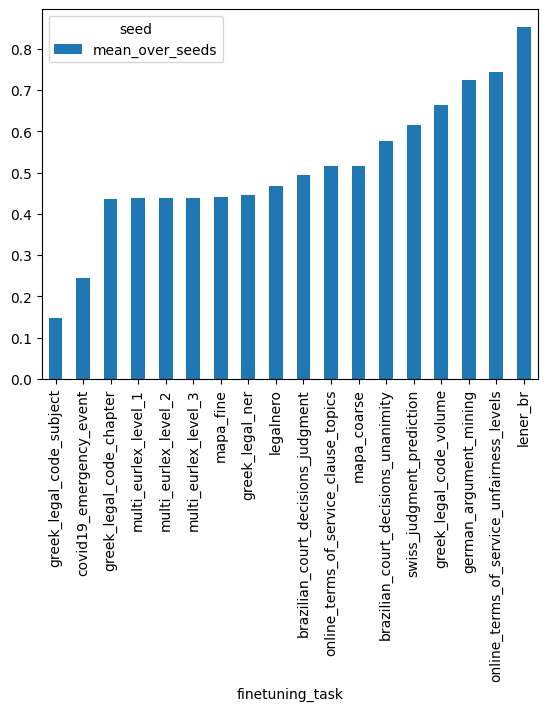

In [6]:
ra.macro_f1_overview[['finetuning_task', 'mean_over_seeds']].groupby('finetuning_task').mean().sort_values('mean_over_seeds').plot.bar()


<AxesSubplot: xlabel='finetuning_task'>

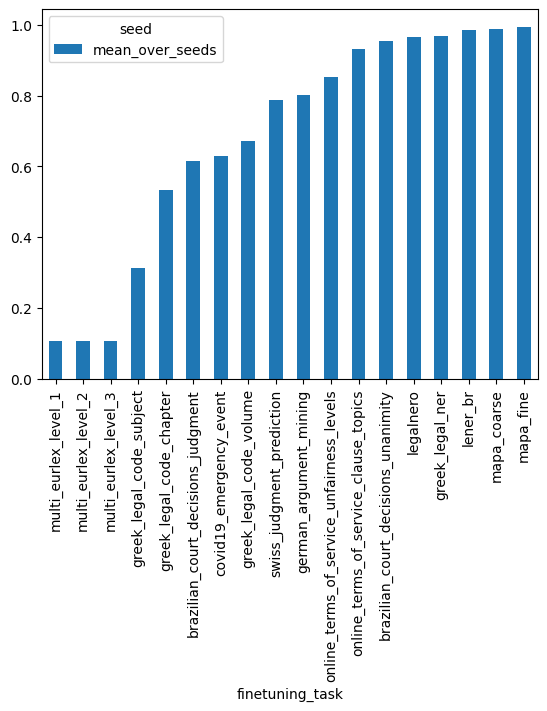

In [7]:
ra.accuracy_normalized_overview[['finetuning_task', 'mean_over_seeds']].groupby('finetuning_task').mean().sort_values('mean_over_seeds').plot.bar()

## 3. Additional features

### 3.1. Task constraint
- We want to calculate a task aggregate score
- It might be useful, to remove some tasks from the calculations
- This can be done by passing a list of tasks we want to consider; see the example below

In [10]:
print('Results for all available tasks:')
print('------------------------')
ra.get_language_aggregated_score()
ra.get_dataset_aggregated_score(average_over_language=True)

lm = ["distilbert-base-multilingual-cased", "microsoft/Multilingual-MiniLM-L12-H384", "xlm-roberta-base", "microsoft/mdeberta-v3-base", "xlm-roberta-large"]

for x in lm:
    print(x)
    print('\t','language aggregated: ',ra.language_aggregated_score.at[x,'aggregated_score'])
    print('\t','dataset aggregated: ', ra.dataset_aggregated_score.at[x,'aggregated_score'])
    print('-----------------------------------')

print('\n##########################\n')

tasks_we_are_interested_in = ['mapa_fine', 'german_argument_mining']
print('Results for only selected tasks:', ', '.join(tasks_we_are_interested_in))
print('------------------------')
ra.get_language_aggregated_score(task_constraint=tasks_we_are_interested_in)
ra.get_dataset_aggregated_score(average_over_language=True, task_constraint=tasks_we_are_interested_in)

lm = ["distilbert-base-multilingual-cased", "microsoft/Multilingual-MiniLM-L12-H384", "xlm-roberta-base", "microsoft/mdeberta-v3-base", "xlm-roberta-large"]

for x in lm:
    print(x)
    print('\t','language aggregated: ',ra.language_aggregated_score.at[x,'aggregated_score'])
    print('\t','dataset aggregated: ', ra.dataset_aggregated_score.at[x,'aggregated_score'])
    print('-----------------------------------')

print('\n##########################\n')

ra.reset_list_of_available_languages()


Results for all available tasks:
------------------------
distilbert-base-multilingual-cased
	 language aggregated:  0.5464508676299626
	 dataset aggregated:  0.5489132483945126
-----------------------------------
microsoft/Multilingual-MiniLM-L12-H384
	 language aggregated:  0.5182980356168256
	 dataset aggregated:  0.5231740886150097
-----------------------------------
xlm-roberta-base
	 language aggregated:  0.38060543974855526
	 dataset aggregated:  0.4869516163915757
-----------------------------------
microsoft/mdeberta-v3-base
	 language aggregated:  0.5848686954223055
	 dataset aggregated:  0.5900987634378875
-----------------------------------
xlm-roberta-large
	 language aggregated:  0.4041780583149576
	 dataset aggregated:  0.4847831445031907
-----------------------------------

##########################

Results for only selected tasks: mapa_fine, german_argument_mining
------------------------
distilbert-base-multilingual-cased
	 language aggregated:  0.5051139152909249
	

### 3.2. Language constraint
- We want to calculate a language aggregate score
- It might be useful, to remove some languages from the calculations
- This can be done with the method `remove_languages({LANGUAGE_ID})`
- You can reset the initial number of languages with the method `reset_list_of_available_languages()`
- This might be useful, if you want to gauge the influence of certain languages on the overall scores (see example below)

In [11]:
ra.reset_list_of_available_languages()

print('Results with all available languages:')
print('------------------------')
ra.get_language_aggregated_score()
ra.get_dataset_aggregated_score(average_over_language=True)

lm = ["distilbert-base-multilingual-cased", "microsoft/Multilingual-MiniLM-L12-H384", "xlm-roberta-base", "microsoft/mdeberta-v3-base", "xlm-roberta-large"]

for x in lm:
    print(x)
    print('\t','language aggregated: ',ra.language_aggregated_score.at[x,'aggregated_score'])
    print('\t','dataset aggregated: ', ra.dataset_aggregated_score.at[x,'aggregated_score'])
    print('-----------------------------------')

print('\n##########################\n')

ra.reset_list_of_available_languages()

ra.remove_languages('pt')

print('Results without Portuguese:')
print('------------------------')
ra.get_language_aggregated_score()
ra.get_dataset_aggregated_score(average_over_language=True)

lm = ["distilbert-base-multilingual-cased", "microsoft/Multilingual-MiniLM-L12-H384", "xlm-roberta-base", "microsoft/mdeberta-v3-base", "xlm-roberta-large"]

for x in lm:
    print(x)
    print('\t','language aggregated: ',ra.language_aggregated_score.at[x,'aggregated_score'])
    print('\t','dataset aggregated: ', ra.dataset_aggregated_score.at[x,'aggregated_score'])
    print('-----------------------------------')

print('\n##########################\n')

ra.reset_list_of_available_languages()


Results with all available languages:
------------------------
distilbert-base-multilingual-cased
	 language aggregated:  0.5464508676299626
	 dataset aggregated:  0.5489132483945126
-----------------------------------
microsoft/Multilingual-MiniLM-L12-H384
	 language aggregated:  0.5182980356168256
	 dataset aggregated:  0.5231740886150097
-----------------------------------
xlm-roberta-base
	 language aggregated:  0.38060543974855526
	 dataset aggregated:  0.4869516163915757
-----------------------------------
microsoft/mdeberta-v3-base
	 language aggregated:  0.5848686954223055
	 dataset aggregated:  0.5900987634378875
-----------------------------------
xlm-roberta-large
	 language aggregated:  0.4041780583149576
	 dataset aggregated:  0.4847831445031907
-----------------------------------

##########################

Results without Portuguese:
------------------------
distilbert-base-multilingual-cased
	 language aggregated:  0.5437018778233417
	 dataset aggregated:  0.5486524983